# Another look at forecast-accuracy metrics for intermitten demand, Rob. J. Hyndman

## Jak można generować przewidzenia?
tutaj: **przewidzenie** - jedna konkretna przewidziana przez model wartość

[obrazek1]
intuicyjnie: na podstawie dotychczasowych danych usiłujemy przewidzieć h kolejnych wartości

[obrazek2]
intuicyjnie: przewidujemy o h późniejszą wartość (jadną!) na podstawie wszystkich poznanych do tej pory. To oczywiście możemy zrobić $m$ razy.

**Teza:** ale zawsze musimy czekać aż nam dojdą kolejne wartości

## Na którym splicie liczyć błąd?
Albo: jak robił to autor publikacji, by wygenerować tabelkę.

1. in-sample
[obrazek3]
Uwaga: używamy do generowania podejścia drugiego

2. out-of-sample
[obrazek4]
Uwaga: używamy do generowania podejścia pierwszego

**Dyskusja:** czy to ma sens? Czy można inaczej?


## Błędy (w sensie metryki) 

[obrazek z danymi]

[tabelka z zaznaczonymi grupami błędów, problematycznymi miejscami]

---
**Modele (wtręt):**
* Mean - średnia ze wszystkich dotychczas poznanych wartości
* Naive - zwraca ostatnią widzianą wartość
* SES - Simple Exponential Smoothing (ktoś słyszał? ktoś zna?)
* Croston - fancy metoda Crostona do tego typu szeregów
---

Autor wyróżnia 4 rodzaje błędów:
* Scale-dependent errors
* Percentage errors
* Relative errors
* Scale-free errors

### Scale-dependent errors

Nech $Y_t$ - t-ta wartość, $F_t$ - modelu przewidzenie t-tej wartości. Wprowadźmy błąd $e_t = Y_t - F_t$. Wartość $e_t$ będzie mieć tę samą skalę co dane.
Przykład: [bleble]
Skoro $e_t$ jest zależne od skali danych, to oparte na nim błędy także będą zależne od skali.

* Mean Absolute Error (**MAE**) = mean$(|e_t|)$
* Geometric Mean Absolute Error (**GMAE**) = gmean$(|e_t|)$
* Mean Square Error (**MSE**) = mean$(e_t^2)$

**Wady:**
Zależność od skali powoduje, że te miary błędu nie nadają się do porównywania metod pomiędzy różnymi szeregami

**Dyskusja:**
A co jeżeli mamy ciąg stale rosnący? Skala będzie się zmieniać wewnątrz jednego szeregu! Zatem wtedy te miary nadawałyby się jedynie do ciągów niestacjonarnych?

Porównanie co się dzieje, jak liczymy te miary na ciągu stacjonarnym i niestacjonarnym.

Autor do pracy z pojedynszym "time series" poleca MAE, bo jest intuicyjne i szybko się liczy. Przytoczeni przez niego autorzy polecają GMAE, ale on się nie zgadza, gdy dane są *intermittent*

### Percentage errors

$p_t = 100\frac{e_t}{Y_t} = 100\frac{Y_t - F_t}{Y_t}$

* Mean Absolute Percentage Error (**MAPE**) mean$(|p_t|)$
* symmetric MAPE (**sMAPE**) = mean$(200 \frac{|Y_t - F_t|}{Y_t+F_t})$

**Zaleta i wady:**

Są niezależne od skali, dlatego są często używane, by porównywać zachowanie modelu na różnych danych. Jeżeli jednak się zdarzy, że dla pewnego $t$ $Y_t$ będzie miało wartość $0$ to pozostajemy z nieskończonościami bądź symbolami nieoznaczonymi. Jeżeli sporo przykładów ma wartości blisko zera, to rozkład *percentage errors* jest bardzo skrzywiony.

$200\frac{coś \quad bardzo\quad małego}{coś \quad innego \quad bardzo \quad małego}$

Wartości sMAPE mogą być ujemne, co też nie jest dobre.

**Dyskusja:**
The MAPE has another disadvantage: it puts heavier penalty on positive errors than on negative errors.

### Relative errors

**Idea:** używamy jakiejś benchmarkowej metody i sprawdzamy o ile jesteśmy lepsi. Autorzy używają metody naiwnej (zwraca ostatnią wartość). Niech $e_t^*$ będzie błędem metody benchmarkowej. Zdefinujmy $r_t = \frac{e_t}{e_t^*}$ jako błąd relatywny.

* Median RElative Absolute Error (**MdRAE**) = median$(|r_t|)$
* Geometric Mean Relative Absolute Error (**GMRAE**) = gmean$(|r_t|)$

**Zalety i wady:**
* scale independent (+)
* może się zdarzyć, że licznik będzie zerem

### Scale-free errors

Zdefiniujmy $q_t = \frac{e_t}{\frac{1}{n-1}\sum\limits_{i=2}^n|Y_i - Y_{i_1}|}$. Zauważmy, że w liczniku mamy znormalizowaną sumę błędów metody naiwnej. *Uwaga:* $1...n$ to dane *in-sample*.

* Mean Absolute Scaled Error (**MASE**) = mean$(|q_t|)$


MASE jest bardzo podobne do metod z sekcji *Relative errors* w tym względzie, że błąd rozważanego modelu jest normalizowany przez błąd modelu naiwnego, jednakże dzięki uśrednieniu tych błędów radzi sobie z problemem zerowego licznika; niezależność od skali zostaje zachowana.

*"The only circumstance under which the AMSE would be infinite or undefined is when all historical observations are equal."*

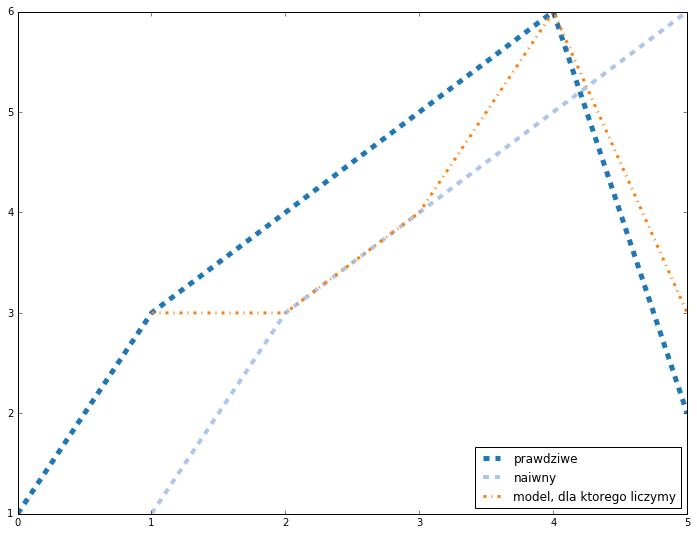

e_N [ 2.  1.  1.  1. -4.]
e_F [ 0.  1.  1.  0. -1.]
r_t [ 0.    1.    1.    0.    0.25]
MdRAE: 0.25
denominator 1.8
q_t [ 0.          0.55555556  0.55555556  0.         -0.55555556]
MASE 0.333333333333


In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# kolory
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
    
# dane
Y = [1, 3, 4, 5, 6, 2]
N = Y[:-1]
F = [3, 3, 4, 6, 3]
ran = range(len(Y))

plt.figure(figsize=(12, 9))

plt.plot(ran, Y, '--', lw=5, c=tableau20[0], label="prawdziwe")
plt.plot(ran[1:], N, '--', lw=4, c=tableau20[1], label="naiwny")
plt.plot(ran[1:], F, '-.', lw=3, c=tableau20[2], label="model, dla ktorego liczymy")

plt.legend(loc=4)

plt.show()

e_N = np.array(Y[1:], dtype=float) - np.array(N, dtype=float)
e_F = np.array(Y[1:], dtype=float) - np.array(F, dtype=float)

print 'e_N', e_N
print "e_F", e_F

# MdRAE
r_t = e_F/e_N
print 'r_t', r_t

MdRAE = np.median(np.abs(r_t))
print 'MdRAE:', MdRAE

# MASE
denominator = np.mean(np.abs(e_N))
q_t = e_F/denominator

print 'denominator', denominator
print 'q_t', q_t

MASE = np.mean(np.abs(q_t))
print 'MASE', MASE